In [3]:
import numpy as np
import pandas as pd

# Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings

# Ignore all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [9]:
df.shape

(235720, 31)

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [50]:

negative_count = (df['Class'] < 0).sum()


print("Number of negative values in 'class':", negative_count)
df['Class'] = df['Class'].fillna(df['Class'].mode()[0])



Number of negative values in 'class': 0


In [51]:
filtered_class = df['Class'][df['Class'] >= 0]
print(np.bincount(filtered_class))
min_max_values = {}

for column in df.columns:

    min_value = df[column].min()
    max_value = df[column].max()

    min_max_values[column] = (min_value, max_value)

min_max_tuples = [(col, min_max_values[col]) for col in min_max_values]


for i in min_max_tuples:
    print(i)



[235290    430]
('Time', (0.0, 148513.0))
('V1', (-56.407509631329, 2.45492999121121))
('V2', (-72.7157275629303, 22.0577289904909))
('V3', (-33.6809840183525, 9.38255843282114))
('V4', (-5.68317119816995, 16.8753440335975))
('V5', (-42.1478983728015, 34.8016658766686))
('V6', (-26.1605059358433, 22.5292984665587))
('V7', (-43.5572415712451, 36.8773682682598))
('V8', (-73.2167184552674, 20.0072083651213))
('V9', (-13.4340663182301, 15.5949946071278))
('V10', (-24.5882624372475, 23.7451361206545))
('V11', (-4.79747346479757, 12.0189131816199))
('V12', (-18.6837146333443, 7.8483920756446))
('V13', (-5.79188120632084, 4.56900895856606))
('V14', (-19.2143254902614, 10.5267660517847))
('V15', (-4.49894467676621, 5.82565431863365))
('V16', (-14.1298545174931, 8.28988955954619))
('V17', (-25.1627993693248, 9.25352625047285))
('V18', (-9.49874592104677, 5.04106918541184))
('V19', (-7.21352743017759, 5.59197142733558))
('V20', (-28.009635333749, 39.4209042482199))
('V21', (-34.8303821448146, 27

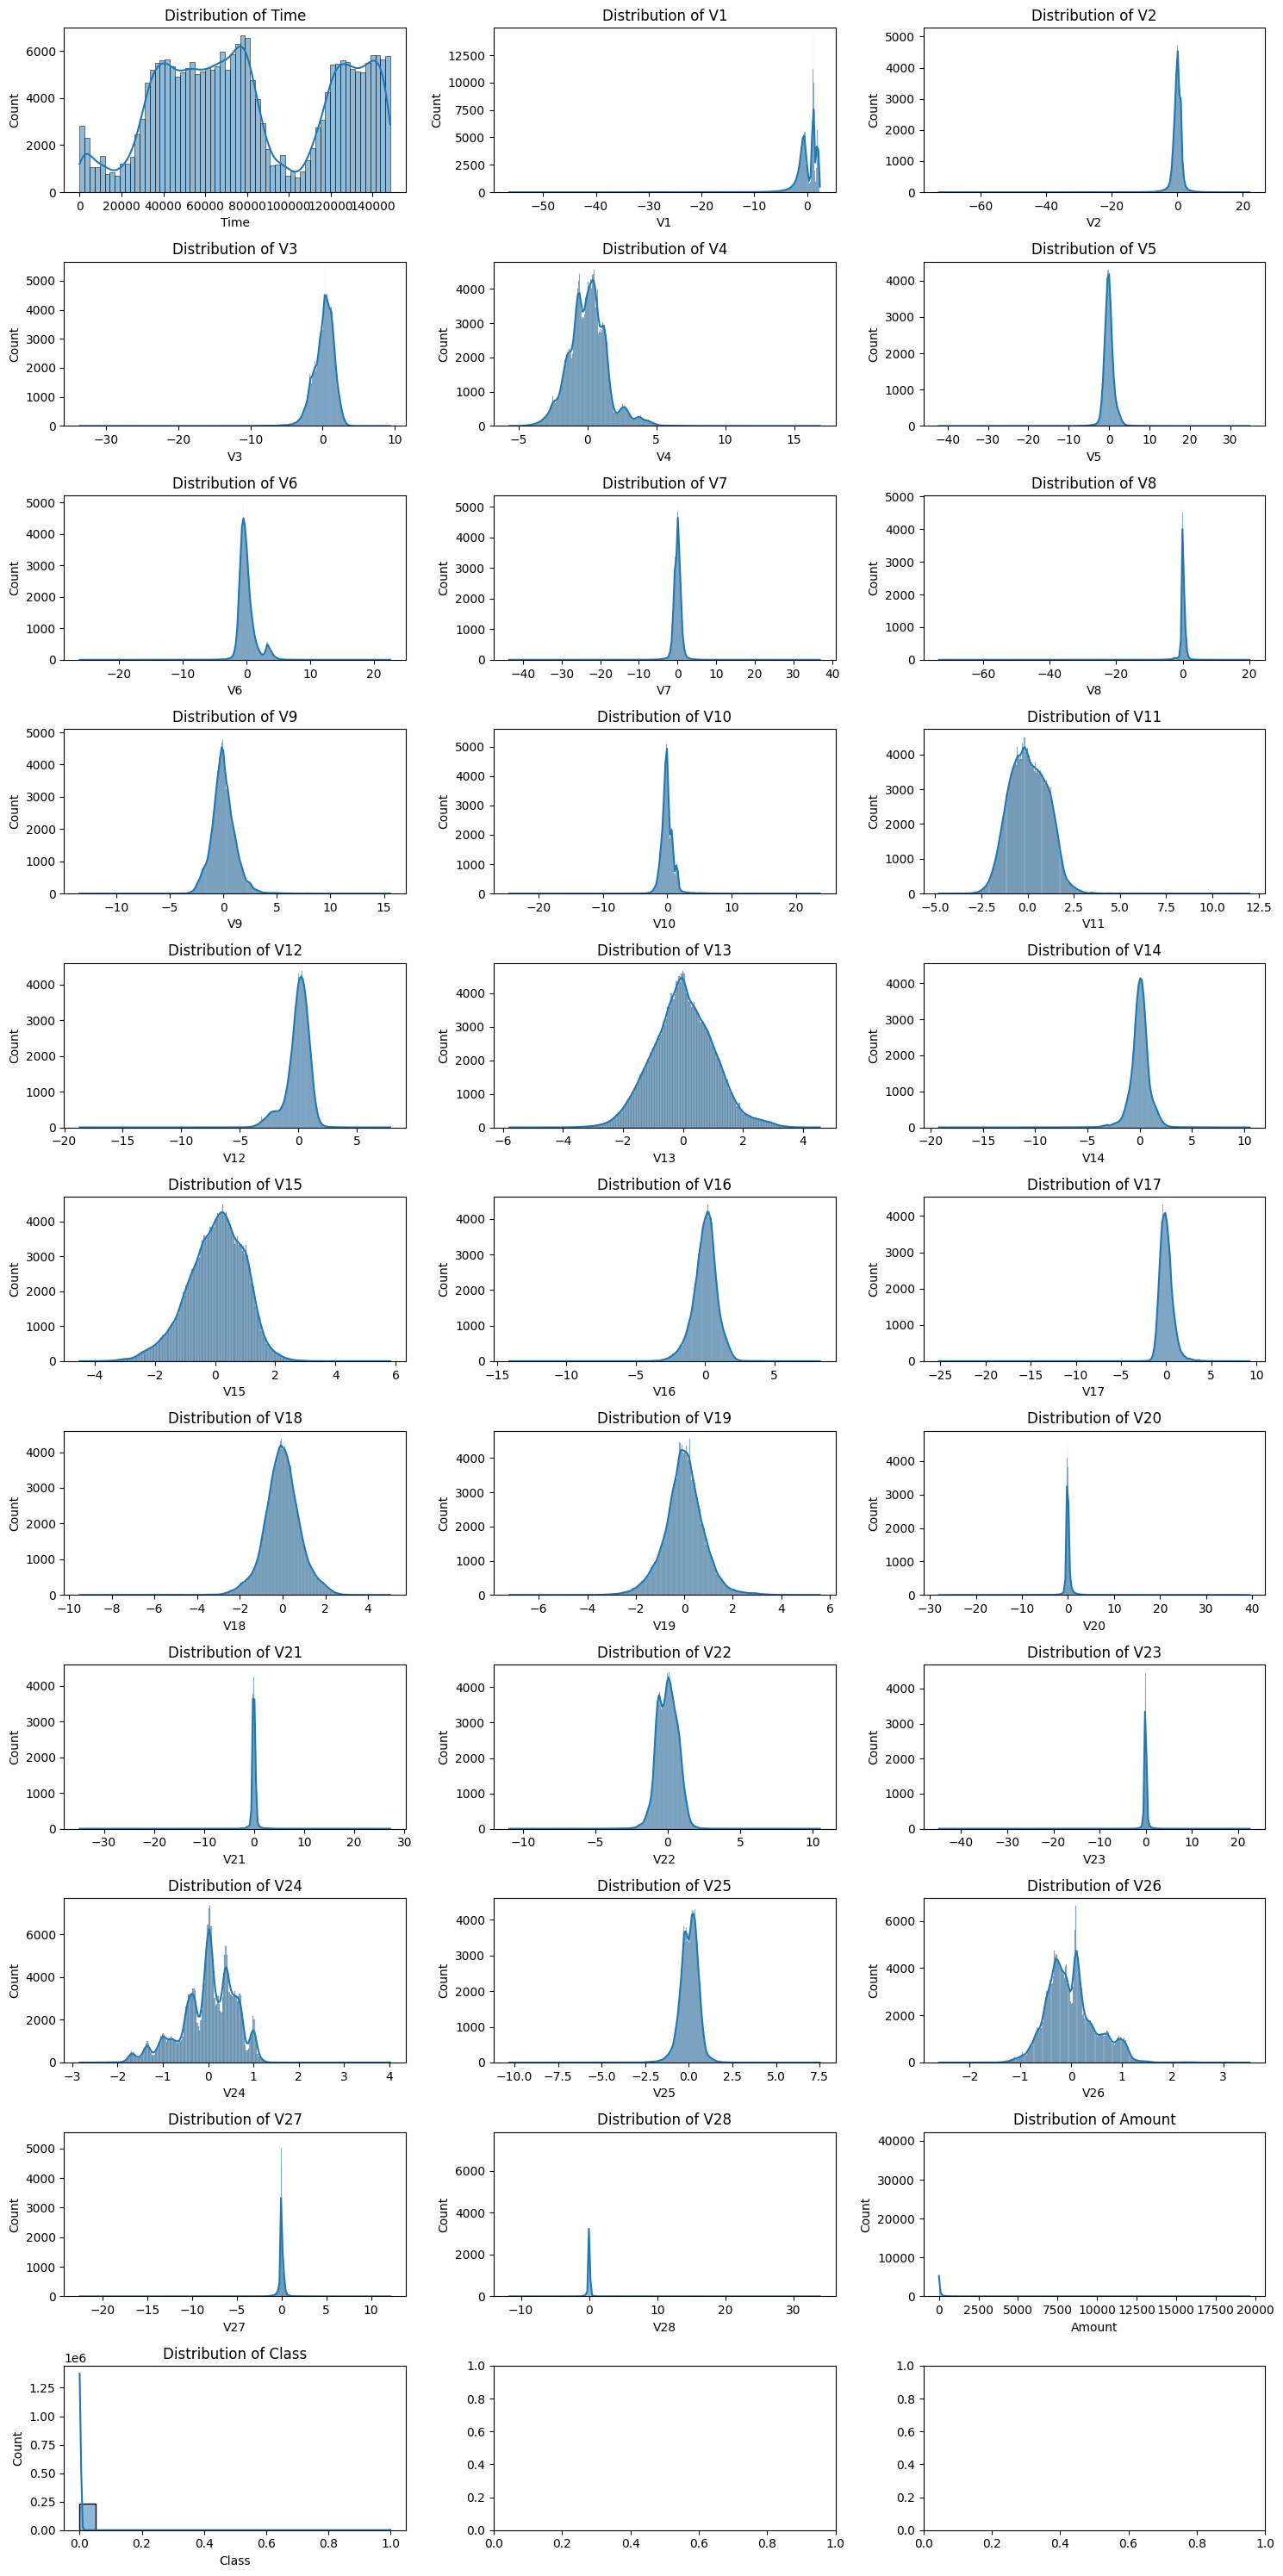

In [20]:
fig, axes = plt.subplots(11, 3, figsize=(15, 30))
for i, column in enumerate(df.columns[:31]):
    sns.histplot(df[column], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [52]:
from sklearn.preprocessing import RobustScaler

features = df.iloc[:, :-1]
class_column = df.iloc[:, -1]


scaler = RobustScaler()


scaled_features = scaler.fit_transform(features)


df_scaled = pd.DataFrame(scaled_features, columns=features.columns)


df_scaled['class'] = class_column.values


df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,-1.007284,-0.608777,-0.099249,1.246193,0.814822,-0.176399,0.603906,0.203395,0.126737,0.337202,...,0.037750,0.281333,-0.301054,0.026277,0.094862,-0.222663,0.819542,-0.285347,1.704825,0.0
1,-1.007284,0.553304,0.145258,-0.098061,0.252068,0.133189,0.137524,-0.084445,0.101061,-0.150281,...,-0.484411,-0.621527,0.413023,-0.496142,0.154293,0.318412,-0.075150,-0.003782,-0.280984,0.0
2,-1.007271,-0.608115,-1.013544,0.813320,0.210694,-0.304541,1.749521,0.702289,0.408070,-1.141625,...,0.707991,0.767819,3.138077,-0.944919,-0.606928,-0.136750,-0.366199,-0.589905,4.800378,0.0
3,-1.007271,-0.429553,-0.180367,0.824542,-0.541502,0.078531,1.275820,0.201597,0.653111,-1.041147,...,-0.188748,0.012828,-0.570303,-1.569465,0.893043,-0.279026,0.374928,0.364009,1.351804,0.0
4,-1.007258,-0.516976,0.586460,0.685982,0.224766,-0.229927,0.290159,0.522823,-0.570526,0.694581,...,0.060089,0.794022,-0.392047,0.121750,-0.419809,0.964932,1.358484,1.573587,0.628598,0.0


In [53]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,...,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000
mean,81309.421008,-0.058486,-0.017399,0.149906,0.038300,-0.053472,0.025844,-0.021503,0.002476,0.001644,...,-0.004719,-0.018303,-0.008836,0.000402,0.031761,0.002508,-0.000098,0.001555,91.179277,0.001824
std,40709.367130,1.957911,1.672539,1.501113,1.414335,1.378130,1.325123,1.232341,1.207137,1.119964,...,0.743732,0.712201,0.644912,0.606417,0.511683,0.486578,0.402527,0.334106,252.704120,0.042672
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,48610.750000,-0.945630,-0.605074,-0.628975,-0.829401,-0.740668,-0.738619,-0.566690,-0.198012,-0.659955,...,-0.225516,-0.533562,-0.166413,-0.349795,-0.279921,-0.330885,-0.070136,-0.049010,6.000000,0.000000
50%,74843.500000,-0.023072,0.064796,0.339358,0.031589,-0.111353,-0.242993,0.014608,0.031585,-0.064535,...,-0.033306,-0.007749,-0.021195,0.046468,0.066876,-0.059482,0.002990,0.015205,23.480000,0.000000
75%,122913.000000,1.250141,0.781110,1.133986,0.823188,0.546006,0.429411,0.539483,0.331532,0.610269,...,0.171810,0.481557,0.130140,0.428842,0.370103,0.251306,0.089183,0.078056,79.990000,0.000000
max,148513.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [54]:
df_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,235720.000000,2.357200e+05,2.357200e+05,235720.000000,235720.000000,2.357200e+05,235720.000000,235720.000000,235720.000000,2.357200e+05,...,2.357200e+05,235720.000000,235720.000000,235720.000000,2.357200e+05,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000
mean,0.087022,-1.612825e-02,-5.929606e-02,-0.107463,0.004061,4.498470e-02,0.230163,-0.032646,-0.054971,5.210036e-02,...,7.194862e-02,-0.010397,0.041675,-0.059162,-5.402166e-02,0.106478,-0.019383,-0.107425,0.914979,0.001824
std,0.547889,8.916734e-01,1.206578e+00,0.851473,0.855830,1.071080e+00,1.134494,1.114058,2.279581,8.817063e-01,...,1.871839e+00,0.701594,2.174691,0.778819,7.871746e-01,0.835771,2.526543,2.629405,3.415382,0.042672
min,-1.007284,-2.567864e+01,-5.250424e+01,-19.297276,-3.458065,-3.267072e+01,-22.189089,-39.389741,-138.323564,-1.052533e+01,...,-8.757800e+01,-10.762677,-151.023511,-3.702748,-1.594136e+01,-4.371537,-141.656974,-92.283988,-0.317340,0.000000
25%,-0.353055,-4.201521e-01,-4.832476e-01,-0.549265,-0.520994,-4.891022e-01,-0.424327,-0.525504,-0.433575,-4.687521e-01,...,-4.837598e-01,-0.517982,-0.489685,-0.508919,-5.335149e-01,-0.466175,-0.458987,-0.505367,-0.236248,0.000000
50%,0.000000,-7.898582e-19,-5.005541e-18,0.000000,0.000000,-5.393059e-18,0.000000,0.000000,0.000000,5.462727e-18,...,8.732063e-18,0.000000,0.000000,0.000000,1.067473e-17,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.646945,5.798479e-01,5.167524e-01,0.450735,0.479006,5.108978e-01,0.575673,0.474496,0.566425,5.312479e-01,...,5.162402e-01,0.482018,0.510315,0.491081,4.664851e-01,0.533825,0.541013,0.494633,0.763752,0.000000
max,0.991484,1.128534e+00,1.586581e+01,5.129553,10.192343,2.713433e+01,19.496330,33.324603,37.722367,1.232816e+01,...,6.854849e+01,10.354294,76.038935,5.106874,1.146528e+01,6.143739,76.258323,266.261370,265.347344,1.000000


In [55]:
import pandas as pd


missing_values = df.isnull().sum()


print(missing_values)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


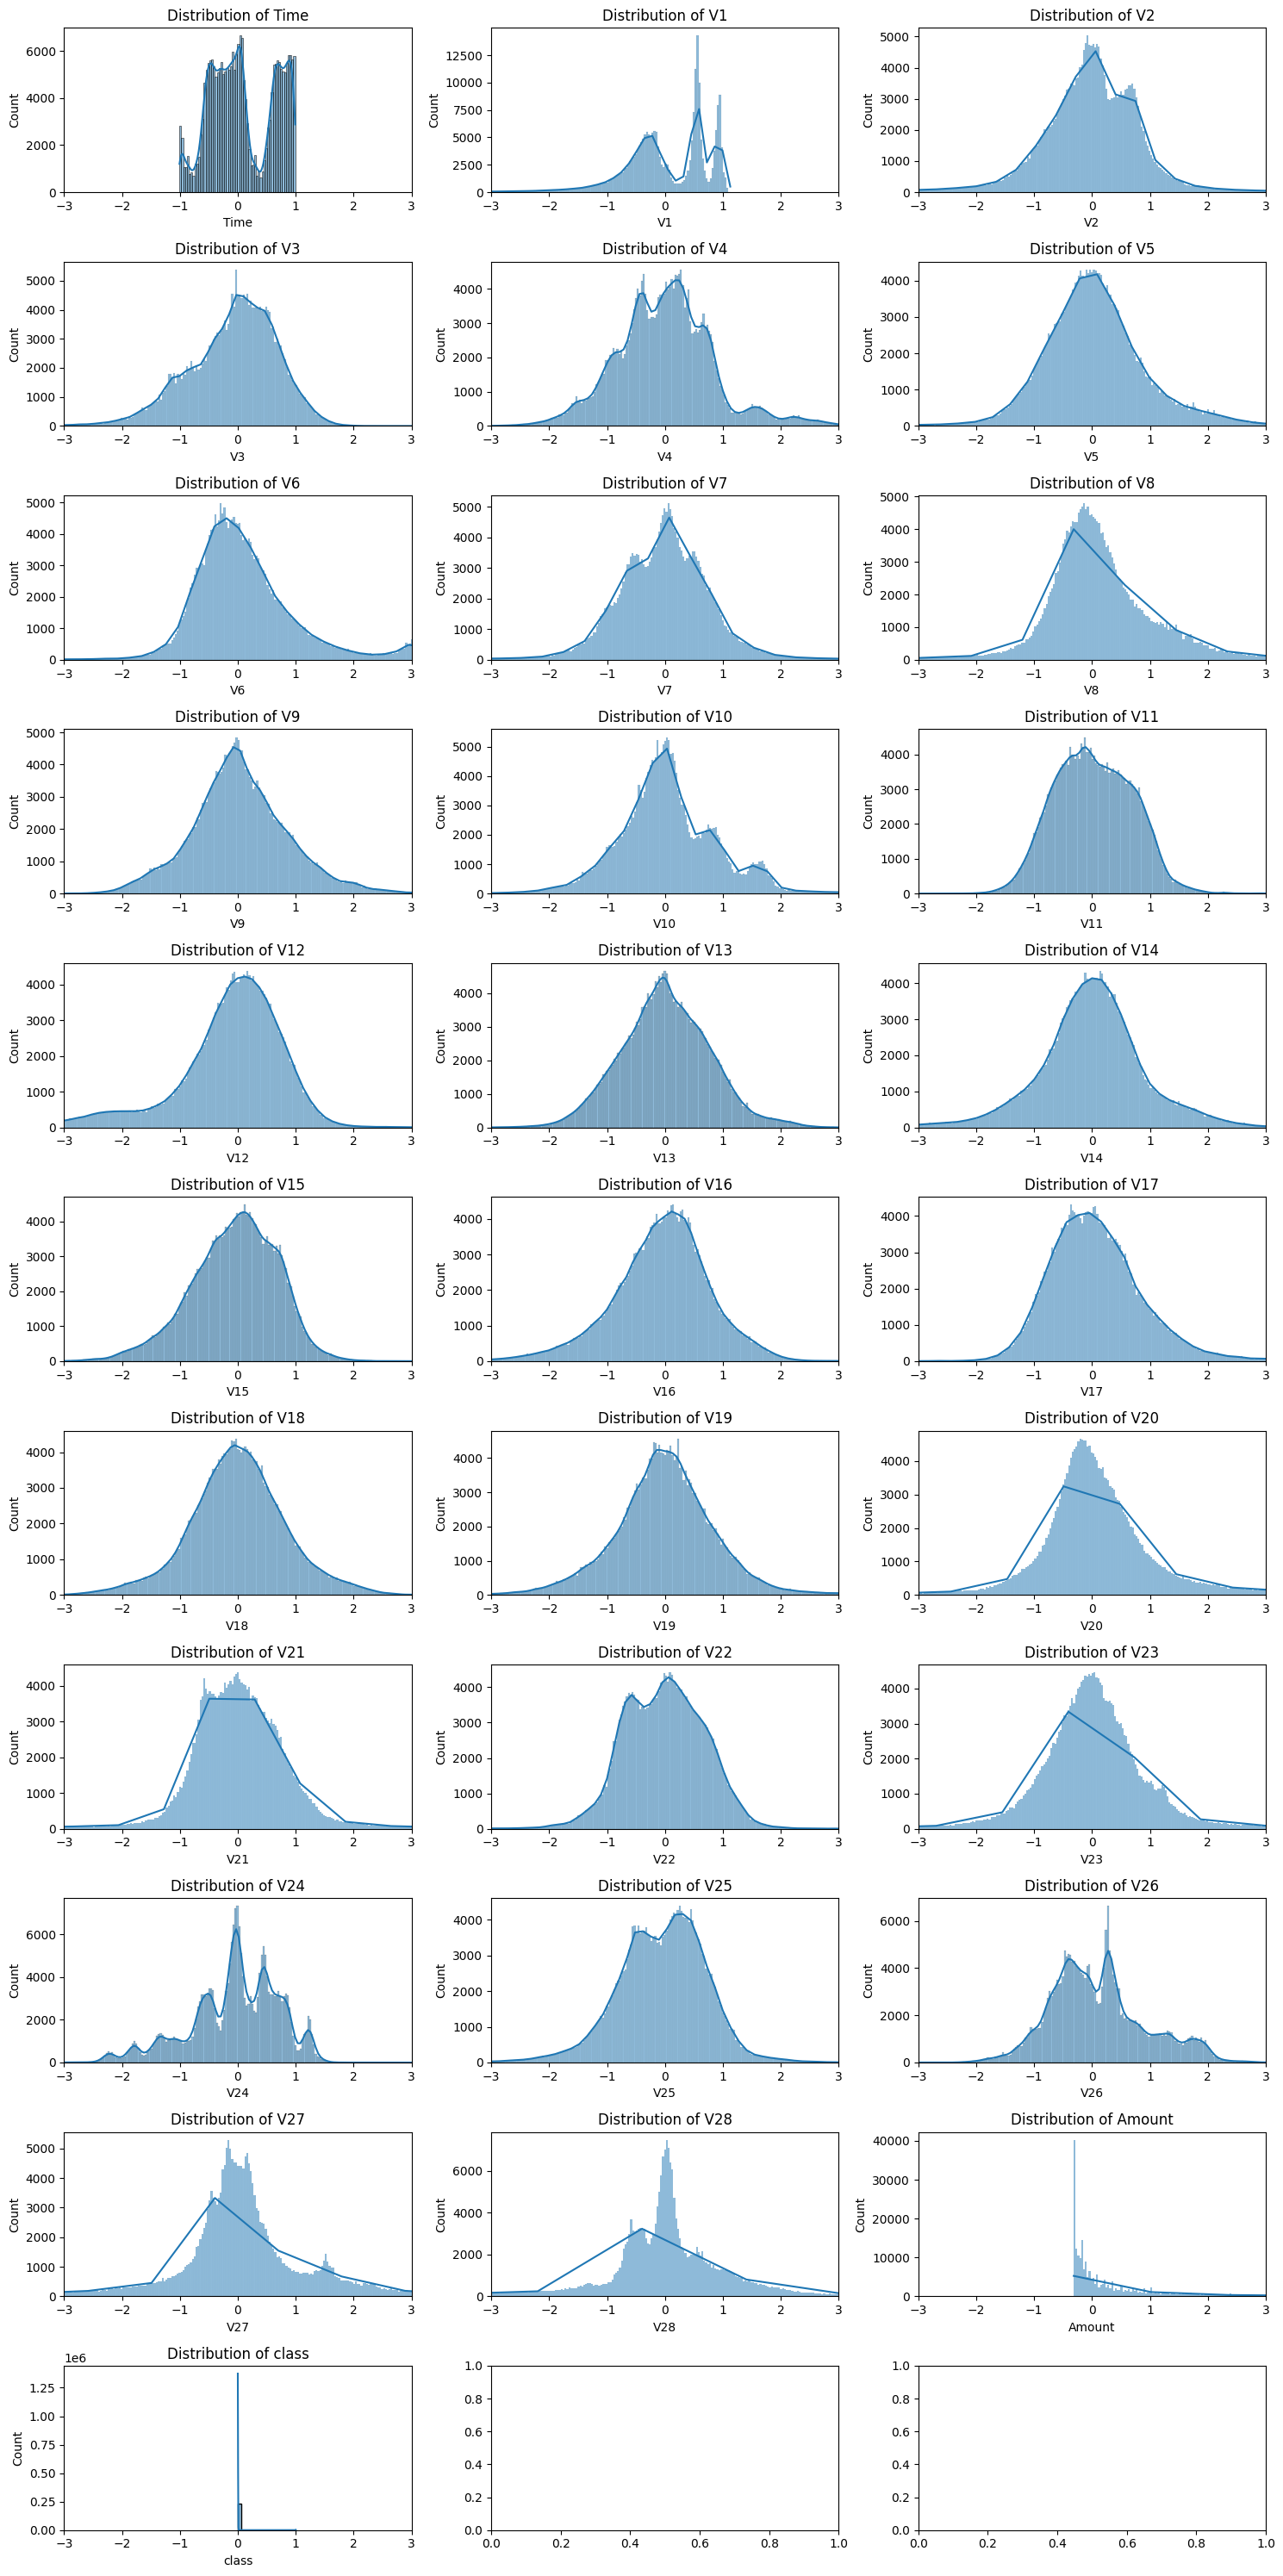

In [58]:
fig, axes = plt.subplots(11, 3, figsize=(15, 30))
for i, column in enumerate(df_scaled.columns[:31]):
    sns.histplot(df_scaled[column], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {column}')
    axes[i // 3, i % 3].set_xlim(-3, 3)  # Set x-limits to see the effect of scaling

plt.tight_layout()
plt.show()

In [60]:
class_weights = {0: 1, 1: 15}

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_scaled.drop(columns=['class'])
y = df_scaled['class']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


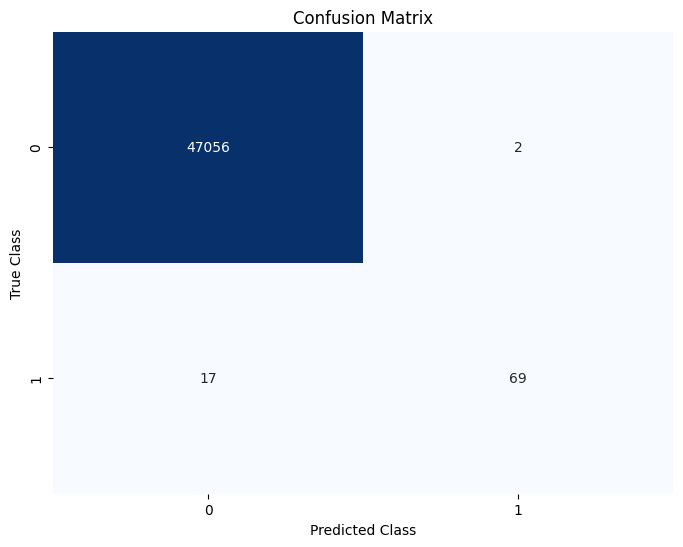

In [65]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)  # fmt='g' formats the values as integers
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

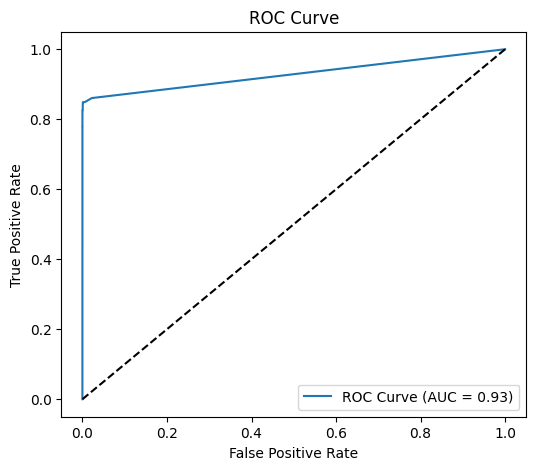

AUC Score: 0.93


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for class 1 (fraud)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f"AUC Score: {auc_score:.2f}")

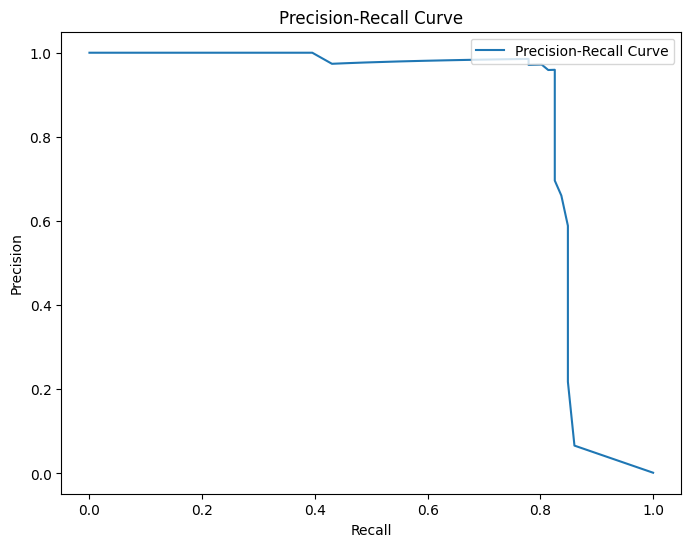

In [69]:

from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [71]:
from sklearn.metrics import f1_score

# F1-score for each class
f1 = f1_score(y_test, y_pred, average='weighted')  # You can also use 'macro' or 'micro'
print(f"Weighted F1-Score: {f1:.2f}")

Weighted F1-Score: 1.00


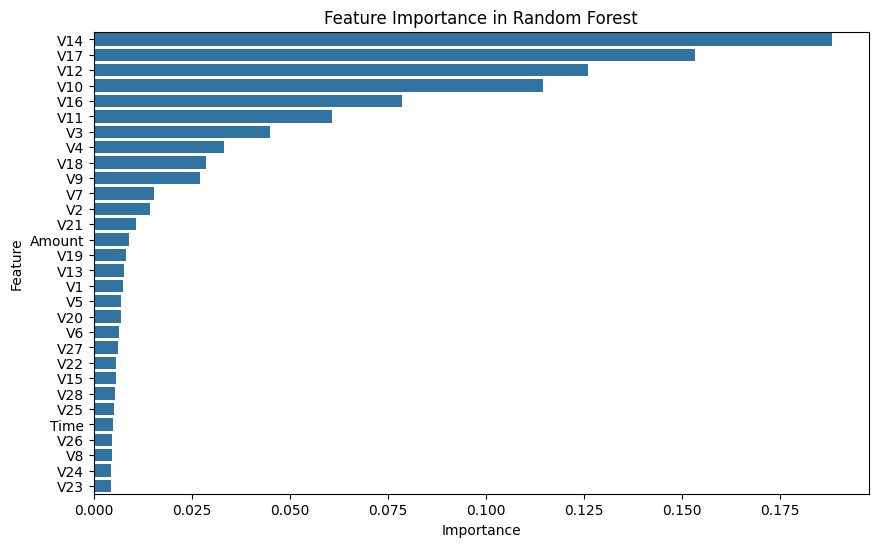

In [72]:
importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()